# Regresion Líneal sencilla con Stats

## Relaciones lineales

Armemos una relación entre Celsius y Farenheit

In [1]:
celsius = [0, 10, 20, 30, 40]
fahrenheit = [32, 50, 68, 86, 104]

print("Celsius:", celsius)
print("Fahrenheit:", fahrenheit)

Celsius: [0, 10, 20, 30, 40]
Fahrenheit: [32, 50, 68, 86, 104]


Armemos una comprensión de lista con esta función para todas las temeperaturas del 0 al 100 de 10 en 10

In [2]:
celsius = list(range(0, 101, 10))
print(celsius)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [3]:
fahrenheit = [((9/5)*temp + 32) for temp in celsius]
print(fahrenheit)

[32.0, 50.0, 68.0, 86.0, 104.0, 122.0, 140.0, 158.0, 176.0, 194.0, 212.0]


Importa Pandas

In [4]:
import pandas as pd

Creamos un DataFrame con las listas

In [6]:
farenheit = [((9/5)*x + 32) for x in range(0, 110, 10)]

In [7]:
datos = pd.DataFrame({
    "Celsius": list(range(0, 110, 10)),
    "Farenheit": farenheit
})

In [8]:
print(datos)

    Celsius  Farenheit
0         0       32.0
1        10       50.0
2        20       68.0
3        30       86.0
4        40      104.0
5        50      122.0
6        60      140.0
7        70      158.0
8        80      176.0
9        90      194.0
10      100      212.0


Arma una gráfica que muestre esta relación

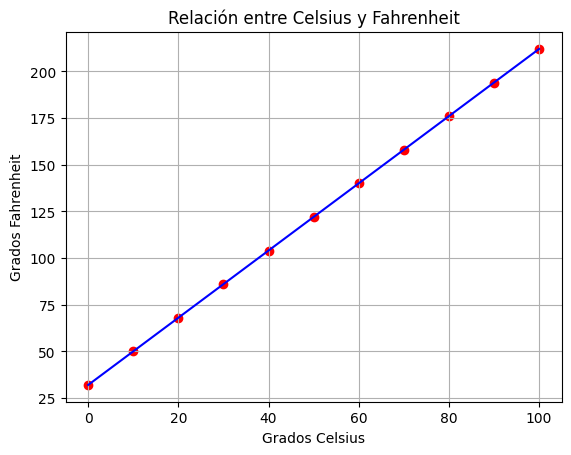

In [10]:
import matplotlib.pyplot as plt

plt.scatter(datos["Celsius"], datos["Farenheit"], color='red')  # puntos
plt.plot(datos["Celsius"], datos["Farenheit"], color='blue')    # línea

plt.title("Relación entre Celsius y Fahrenheit")
plt.xlabel("Grados Celsius")
plt.ylabel("Grados Fahrenheit")
plt.grid(True)
plt.show()

## Regresión lineal con King_county

Carga los datos de King county a un dataframe

In [12]:
import pandas as pd

df = pd.read_csv("kc_house_data.csv")

Veamos el Head

In [13]:
df.head()

,sqft,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Veamos el Tail

In [14]:
df.tail()

,sqft,price
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0
21612,1020,325000.0


Vamos cambiando los titulos de columnas

In [15]:
df.rename(columns={
    "price": "Precio",
    "sqft_living": "Metros_cuadrados",
    "bedrooms": "Habitaciones",
    "bathrooms": "Baños"
}, inplace=True)

df.head()

,sqft,Precio
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Ceca tu nuevo head

In [16]:
df.head()

,sqft,Precio
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Importa stats de scipy

In [17]:
from scipy import stats

Arma un modelo de regresión lineal

In [19]:
df.columns

Index(['sqft', 'Precio'], dtype='object')

In [21]:
x = df["sqft"]
y = df["Precio"]

modelo = stats.linregress(x, y)
modelo

LinregressResult(slope=np.float64(280.8066899295009), intercept=np.float64(-43867.60153385613), rvalue=np.float64(0.7020437212325276), pvalue=np.float64(0.0), stderr=np.float64(1.9376149902337922), intercept_stderr=np.float64(4405.45544328903))

Chea la pendiente

In [22]:
modelo.slope

np.float64(280.8066899295009)

In [23]:
modelo.intercept

np.float64(-43867.60153385613)

Checa la intercepción

In [24]:
modelo.slope * 2000 + modelo.intercept  

np.float64(517745.7783251457)

PrecioVenta = 280.80*Areaft - 43,867.60

Vamos a predecir el precio de alguna casa

In [25]:
area = 2000  
precio_estimado = modelo.slope * area + modelo.intercept
precio_estimado

np.float64(517745.7783251457)

Compara con la realidad

### Hacer la gráfica

Importa Seaborn

In [27]:
import seaborn as sns

Pon el estilo como Whitegrid

In [28]:
sns.set_style("whitegrid")

Arma una regplot de sns

<Axes: xlabel='sqft', ylabel='Precio'>

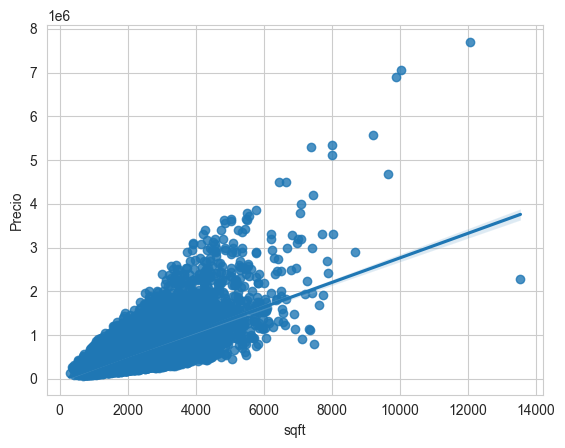

In [29]:
sns.regplot(x="sqft", y="Precio", data=df)